In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
publ_sect = pd.read_excel("C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/BRICS_World_Bank_Indicators/BRICS_Public_Sector_and_Society_Data.xlsx")

In [4]:
top10depart_RF_1995_2018 = pd.read_csv("C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/top10depart_RF_1995_2018.csv") 

In [5]:
top10depart_RF_1995_2018 = top10depart_RF_1995_2018.set_index('Unnamed: 0')

In [6]:
top10depart_RF_1995_2018.index.names = [None]

In [7]:
pb_s = publ_sect.copy()

In [8]:
pb_s = pb_s.rename(columns={"Country Name": "Country_Name","Country Code": "Country_Code", "Series Name": "Series_Name", "Series Code": "Series_Code"})

In [9]:
pb_s.columns = pb_s.columns.str.replace(' \[YR\d+\]', '', regex=True)

In [51]:
pb_s.Series_Name.unique()

array(['Adequacy of social insurance programs (% of total welfare of beneficiary households)',
       'Adequacy of social protection and labor programs (% of total welfare of beneficiary households)',
       'Adequacy of social safety net programs (% of total welfare of beneficiary households)',
       'Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households)',
       'Air transport, freight (million ton-km)',
       'Air transport, passengers carried',
       'Air transport, registered carrier departures worldwide',
       'Annualized average growth rate in per capita real survey mean consumption or income, bottom 40% of population (%)',
       'Annualized average growth rate in per capita real survey mean consumption or income, total population (%)',
       'Armed forces personnel (% of total labor force)',
       'Armed forces personnel, total',
       'Arms exports (SIPRI trend indicator values)',
       'Arms imports (SIPRI trend indicator values)'

In [10]:
pb_s_RF = pb_s.loc[pb_s["Country_Name"] == "Russian Federation", :]

In [11]:
pb_s_RF_1995_2018 = pb_s_RF.drop(pb_s_RF.loc[:,'1970':'1994'].columns, axis=1)

In [12]:
pb_s_RF_1995_2018=pb_s_RF_1995_2018.drop(['Country_Code','Series_Code'], axis=1) 

In [13]:
result = pd.concat([top10depart_RF_1995_2018, pb_s_RF_1995_2018], axis=0)

In [14]:
result_melt = result.melt(id_vars=['Country_Name','Series_Name'], value_vars=['1995','1996','1997','1998','1999','2000','2001'
                                                                              ,'2002','2003','2004','2005','2006','2007','2008'
                                                                              ,'2009','2010','2011','2012','2013','2014','2015'
                                                                              ,'2016','2017','2018','2019','2020'], ignore_index=False) #or transpose

In [52]:
result_melt

,Country_Name,Series_Name,variable,value
4,Russian Federation,NaN,1995,2.132900e+07
957,Russian Federation,Adequacy of social insurance programs (% of to...,1995,NaN
958,Russian Federation,Adequacy of social protection and labor progra...,1995,NaN
959,Russian Federation,Adequacy of social safety net programs (% of t...,1995,NaN
960,Russian Federation,Adequacy of unemployment benefits and ALMP (% ...,1995,NaN
961,Russian Federation,"Air transport, freight (million ton-km)",1995,8.901000e+02
962,Russian Federation,"Air transport, passengers carried",1995,2.652480e+07
963,Russian Federation,"Air transport, registered carrier departures w...",1995,5.863000e+05
964,Russian Federation,Annualized average growth rate in per capita r...,1995,NaN
965,Russian Federation,Annualized average growth rate in per capita r...,1995,NaN


In [15]:
result_transpose = result.T

In [16]:
df=result_transpose.copy()

In [17]:
df.columns = df.columns.astype(str)

In [18]:
df = df.rename(columns={'4': 'dep4'})

In [19]:
df = df.drop(['Country_Name','Series_Name','2020'])

In [20]:
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

In [21]:
df.corrwith(df["dep4"],axis=0).sort_values()

1198   -0.924181
1197   -0.905320
1194   -0.883857
1259   -0.875019
1258   -0.874973
1062   -0.871027
1262   -0.867470
1263   -0.867470
1123   -0.865785
1235   -0.864689
1261   -0.858308
1260   -0.858267
1196   -0.857890
1121   -0.856422
1060   -0.853349
1120   -0.843470
1124   -0.841938
1064   -0.838199
1122   -0.837366
1265   -0.818356
1193   -0.816428
1186   -0.815993
1188   -0.812903
1243   -0.809446
1264   -0.808954
1187   -0.808546
1239   -0.799644
1061   -0.794905
1211   -0.784142
1192   -0.782473
1269   -0.778889
1250   -0.774464
1238   -0.770820
1268   -0.769324
981    -0.767724
1249   -0.766209
1195   -0.765211
1251   -0.754101
1222   -0.748625
976    -0.748032
1267   -0.732556
1220   -0.728067
1090   -0.726129
1266   -0.722962
966    -0.703705
1128   -0.701199
1184   -0.698943
1110   -0.696773
1199   -0.689679
1063   -0.685744
1223   -0.674747
1221   -0.668836
1119   -0.668255
1200   -0.666214
1236   -0.649909
1257   -0.627200
967    -0.624709
1203   -0.621947
1132   -0.6149

In [22]:
df_ind = df.reset_index()

In [36]:
result_transpose[[1056,1242,1234,1162,1244,1012,1088,1246,1232,1073,1164,1163,1069,1204,1091,1071,1189,1188,1190]].iloc[1] 

1056        Customs and other import duties (current LCU)
1242           Taxes on international trade (current LCU)
1234                       Taxes on exports (current LCU)
1162                   Military expenditure (current USD)
1244           Trademark applications, direct nonresident
1012    Container port traffic (TEU: 20 foot equivalen...
1088        GDP per person employed (constant 2017 PPP $)
1246        Trademark applications, nonresident, by count
1232                            Tax revenue (current LCU)
1073    Employment to population ratio, 15+, total (%)...
1164       Mobile cellular subscriptions (per 100 people)
1163                        Mobile cellular subscriptions
1069    Employment to population ratio, 15+, female (%...
1204         Railways, goods transported (million ton-km)
1091             Goods and services expense (current LCU)
1071    Employment to population ratio, 15+, male (%) ...
1189                    Patent applications, nonresidents
1188    Part t

In [53]:
melt_to_plot0 = result_melt[result_melt.index.isin([1066,1067,1068])]

In [48]:
melt_to_plot1 = result_melt[result_melt.index.isin([1073,1069,1071])]

In [38]:
melt_to_plot2 = result_melt[result_melt.index.isin([1232])]

In [39]:
melt_to_plot3 = result_melt[result_melt.index.isin([1162])]

In [40]:
melt_to_plot4 = result_melt[result_melt.index.isin([1190])]

In [41]:
melt_to_plot5 = result_melt[result_melt.index.isin([1012])]

In [54]:
melt_ind0 = melt_to_plot0.reset_index()

In [49]:
melt_ind1 = melt_to_plot1.reset_index()

In [43]:
melt_ind2 = melt_to_plot2.reset_index()

In [44]:
melt_ind3 = melt_to_plot3.reset_index()

In [45]:
melt_ind4 = melt_to_plot4.reset_index()

In [46]:
melt_ind5 = melt_to_plot5.reset_index()

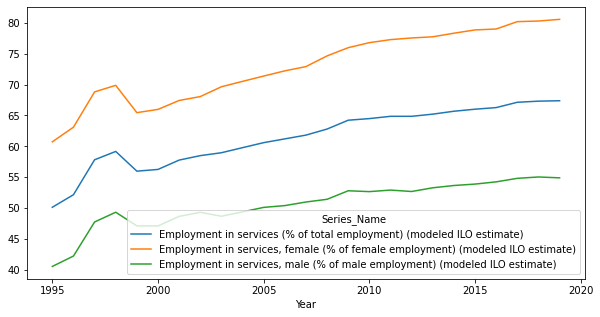

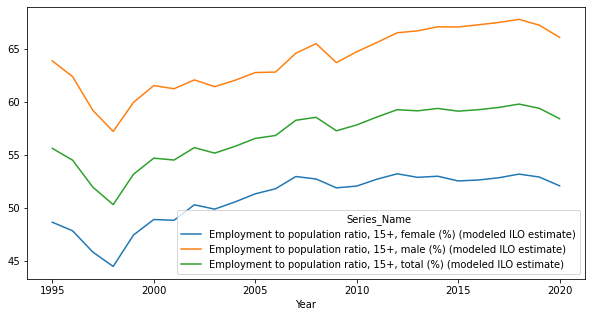

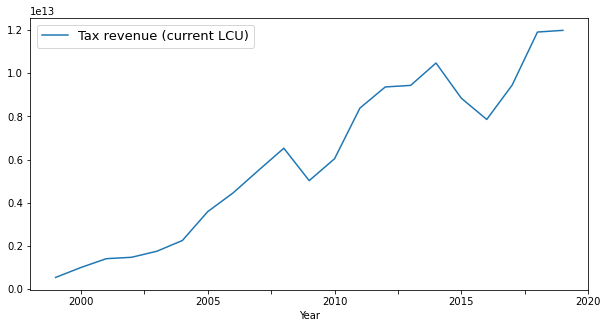

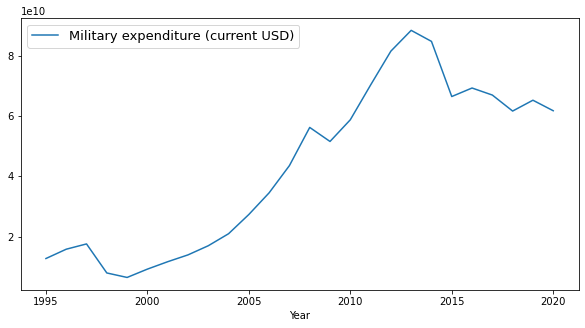

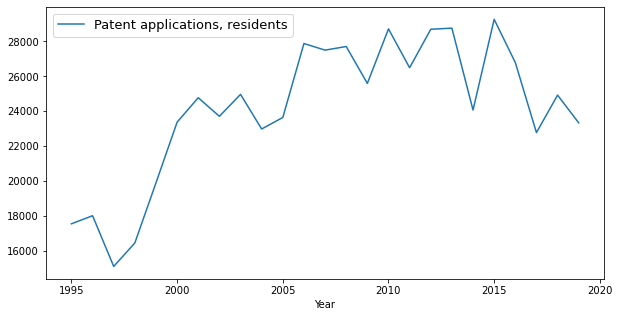

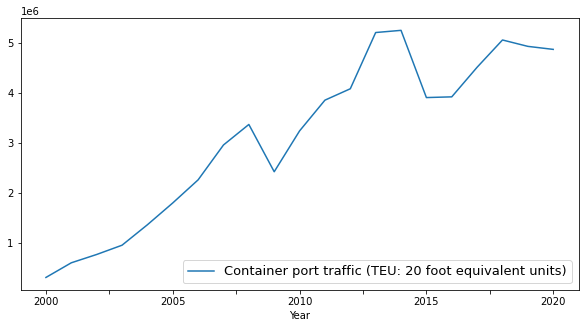

In [57]:
e_ch0 = melt_ind0.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch0.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel('Year')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.legend(fontsize=13)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/pb_s_RF_0.png',dpi=200
           ,bbox_inches='tight') 
e_ch1 = melt_ind1.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch1.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel('Year')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.legend(fontsize=13)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/pb_s_RF_1.png',dpi=200
           ,bbox_inches='tight') 
e_ch2 = melt_ind2.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch2.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel('Year')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(fontsize=13)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/pb_s_RF_2.png',dpi=200
           ,bbox_inches='tight') 
e_ch3 = melt_ind3.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch3.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel('Year')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(fontsize=13)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/pb_s_RF_3.png',dpi=200
           ,bbox_inches='tight') 
e_ch4 = melt_ind4.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch4.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel('Year')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(fontsize=13)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/pb_s_RF_4.png',dpi=200
           ,bbox_inches='tight') 
e_ch5 = melt_ind5.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch5.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel('Year')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(fontsize=13)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/pb_s_RF_5.png',dpi=200
           ,bbox_inches='tight') 

In [58]:
result_transpose[[1198,1197,1194,1259,1258,1062,1262,1263,1123,1235,1261,1260,1196]].iloc[1]

1198    Poverty headcount ratio at national poverty li...
1197    Poverty headcount ratio at $5.50 a day (2011 P...
1194            Poverty gap at $5.50 a day (2011 PPP) (%)
1259    Unemployment, female (% of female labor force)...
1258    Unemployment, female (% of female labor force)...
1062    Employment in agriculture, male (% of male emp...
1262    Unemployment, total (% of total labor force) (...
1263    Unemployment, total (% of total labor force) (...
1123                     Interest payments (% of expense)
1235           Taxes on goods and services (% of revenue)
1261    Unemployment, male (% of male labor force) (na...
1260    Unemployment, male (% of male labor force) (mo...
1196    Poverty headcount ratio at $3.20 a day (2011 P...
Name: Series_Name, dtype: object

In [65]:
melt_neg1 = result_melt[result_melt.index.isin([1263,1235])] #1262

In [66]:
melt_plot1 = melt_neg1.reset_index()

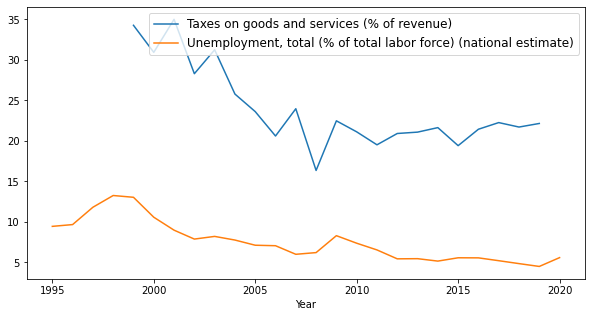

In [67]:
h_neg1 = melt_neg1.pivot(index = 'variable', columns='Series_Name', values='value')
h_neg1.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel('Year')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.axvline(x=14, color='grey',ls='--') #2015=20, 2010=15
#ax.axvline(x=19, color='grey',ls='--')
ax.legend(fontsize=12)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/pb_s_neg_RF_1.png',dpi=200
           ,bbox_inches='tight')